In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import subprocess

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD

### Data preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. The dataset contains separate folders for training and test sets.

In [4]:
path = Path.cwd()
data_dir = path / 'data'
print(data_dir)

/home/jovyan/workspace/ml-zoomcamp/2023/homework/08/data


In [5]:
dataset_url = 'https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip'
if not data_dir.exists():
    subprocess.run(['wget', dataset_url])
    subprocess.run(['unzip', 'data.zip'])

(1, 240, 320, 3)


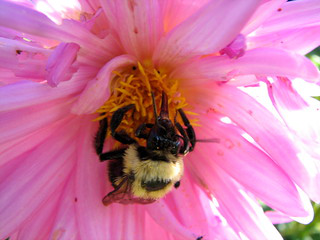

In [6]:
path = data_dir / 'train/bee/'
name = '210144361_aac82685de_n.jpg'
fullname = path / name
img = load_img(fullname)
x = np.array(img)
X = np.array([x])
print(X.shape)
img

In [7]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory('./data/train/',
                                         target_size=(150, 150),
                                         batch_size=32,
                                         class_mode='binary')
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory('./data/test/',
                                       target_size=(150, 150),
                                       batch_size=32,
                                       class_mode='binary',
                                       shuffle=False)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [8]:
print(train_ds.class_indices)
print(test_ds.class_indices)

{'bee': 0, 'wasp': 1}
{'bee': 0, 'wasp': 1}


In [9]:
!pip install scipy

In [10]:
batch_data, batch_labels = train_ds.next()
print(f"Shape of batch_data for batch: {batch_data.shape}")
print(f"Shape of batch_labels for batch: {batch_labels.shape}")

Shape of batch_data for batch: (32, 150, 150, 3)
Shape of batch_labels for batch: (32,)


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer `(Conv2D)`:
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation
* Reduce the size of the feature map with max pooling (`MaxPooling2D`)
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a `Flatten` layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

In [11]:
input_shape = (150, 150, 3)
learning_rate=0.002
momentum=0.8

In [12]:
model = Sequential()
model.trainable = True
model.add(Input(shape=input_shape))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `binary crossentropy`
* `categorical crossentropy`
* `mean squared error`
* `cosine similarity`

#### Plots for binary crossentropy loss

In [13]:
loss='binary_crossentropy'
model.compile(optimizer = SGD(learning_rate=learning_rate, momentum=momentum),
              loss=loss, metrics = ['accuracy'])

In [14]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
115/115 [==============================] - 12s 82ms/step - loss: 0.6231 - accuracy: 0.6426 - val_loss: 0.5587 - val_accuracy: 0.7059
Epoch 2/10
115/115 [==============================] - 9s 79ms/step - loss: 0.5119 - accuracy: 0.7577 - val_loss: 0.5094 - val_accuracy: 0.7516
Epoch 3/10
115/115 [==============================] - 9s 79ms/step - loss: 0.4560 - accuracy: 0.7990 - val_loss: 0.5287 - val_accuracy: 0.7473
Epoch 4/10
115/115 [==============================] - 9s 79ms/step - loss: 0.4154 - accuracy: 0.8159 - val_loss: 0.5004 - val_accuracy: 0.7603
Epoch 5/10
115/115 [==============================] - 9s 80ms/step - loss: 0.3930 - accuracy: 0.8308 - val_loss: 0.5230 - val_accuracy: 0.7418
Epoch 6/10
115/115 [==============================] - 9s 79ms/step - loss: 0.3369 - accuracy: 0.8648 - val_loss: 0.5143 - val_accuracy: 0.7582
Epoch 7/10
115/115 [==============================] - 9s 79ms/step - loss: 0.3044 - accuracy: 0.8825 - val_loss: 0.5102 - val_accuracy: 0.774

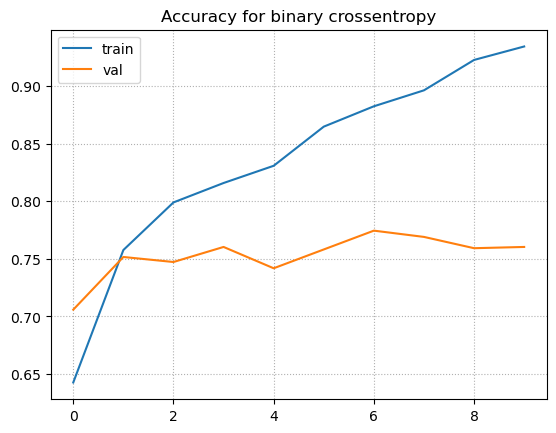

In [15]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy for binary crossentropy')
plt.legend()
plt.grid(linestyle=':')
plt.show()

#### Plots for categorical crossentropy loss

In [16]:
model = Sequential()
model.trainable = True
model.add(Input(shape=input_shape))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
loss='categorical_crossentropy'
model.compile(optimizer = SGD(learning_rate=learning_rate, momentum=momentum),
              loss=loss, metrics = ['accuracy'])

In [18]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
115/115 [==============================] - 10s 80ms/step - loss: nan - accuracy: 0.5358 - val_loss: nan - val_accuracy: 0.5370
Epoch 2/10
115/115 [==============================] - 9s 80ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 3/10
115/115 [==============================] - 9s 79ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 4/10
115/115 [==============================] - 9s 80ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 5/10
115/115 [==============================] - 9s 80ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 6/10
115/115 [==============================] - 9s 79ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 7/10
115/115 [==============================] - 9s 78ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 8/10
115/115 [====================

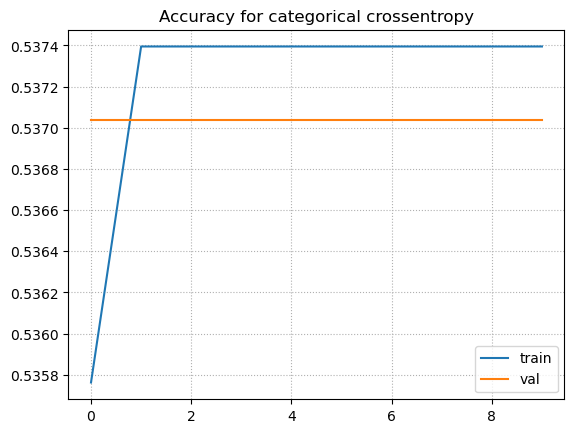

In [19]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy for categorical crossentropy')
plt.legend()
plt.grid(linestyle=':')
plt.show()

#### Plots for mean squared error loss

In [20]:
model = Sequential()
model.trainable = True
model.add(Input(shape=input_shape))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
loss='mean_squared_error'
model.compile(optimizer = SGD(learning_rate=learning_rate, momentum=momentum),
              loss=loss, metrics = ['accuracy'])

In [22]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
115/115 [==============================] - 10s 80ms/step - loss: 0.2263 - accuracy: 0.6201 - val_loss: 0.1936 - val_accuracy: 0.7146
Epoch 2/10
115/115 [==============================] - 9s 80ms/step - loss: 0.1872 - accuracy: 0.7270 - val_loss: 0.1807 - val_accuracy: 0.7320
Epoch 3/10
115/115 [==============================] - 9s 79ms/step - loss: 0.1630 - accuracy: 0.7716 - val_loss: 0.1818 - val_accuracy: 0.7255
Epoch 4/10
115/115 [==============================] - 9s 79ms/step - loss: 0.1485 - accuracy: 0.7952 - val_loss: 0.1639 - val_accuracy: 0.7603
Epoch 5/10
115/115 [==============================] - 9s 79ms/step - loss: 0.1325 - accuracy: 0.8262 - val_loss: 0.1642 - val_accuracy: 0.7745
Epoch 6/10
115/115 [==============================] - 9s 80ms/step - loss: 0.1230 - accuracy: 0.8442 - val_loss: 0.1593 - val_accuracy: 0.7745
Epoch 7/10
115/115 [==============================] - 9s 79ms/step - loss: 0.1088 - accuracy: 0.8651 - val_loss: 0.1598 - val_accuracy: 0.765

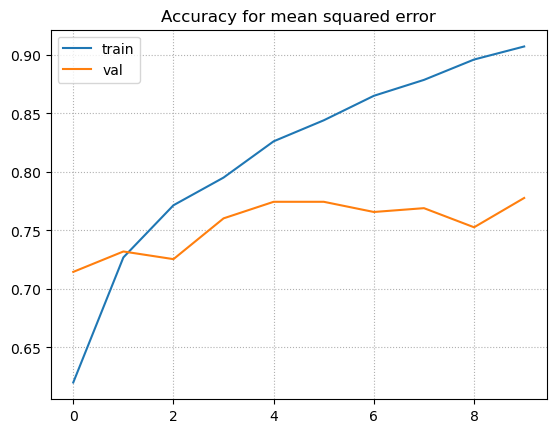

In [23]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy for mean squared error')
plt.legend()
plt.grid(linestyle=':')
plt.show()

#### Plots for cosine similarity loss

In [24]:
model = Sequential()
model.trainable = True
model.add(Input(shape=input_shape))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
loss='cosine_similarity'
model.compile(optimizer = SGD(learning_rate=learning_rate, momentum=momentum),
              loss=loss, metrics = ['accuracy'])

In [26]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
115/115 [==============================] - 10s 81ms/step - loss: -0.4626 - accuracy: 0.4971 - val_loss: -0.4630 - val_accuracy: 0.5000
Epoch 2/10
115/115 [==============================] - 9s 77ms/step - loss: -0.4626 - accuracy: 0.4971 - val_loss: -0.4630 - val_accuracy: 0.5000
Epoch 3/10
115/115 [==============================] - 9s 80ms/step - loss: -0.4626 - accuracy: 0.4971 - val_loss: -0.4630 - val_accuracy: 0.5000
Epoch 4/10
115/115 [==============================] - 9s 79ms/step - loss: -0.4626 - accuracy: 0.4971 - val_loss: -0.4630 - val_accuracy: 0.5000
Epoch 5/10
115/115 [==============================] - 9s 79ms/step - loss: -0.4626 - accuracy: 0.4971 - val_loss: -0.4630 - val_accuracy: 0.5000
Epoch 6/10
115/115 [==============================] - 9s 80ms/step - loss: -0.4626 - accuracy: 0.4971 - val_loss: -0.4630 - val_accuracy: 0.5000
Epoch 7/10
115/115 [==============================] - 9s 79ms/step - loss: -0.4626 - accuracy: 0.4971 - val_loss: -0.4630 - val_a

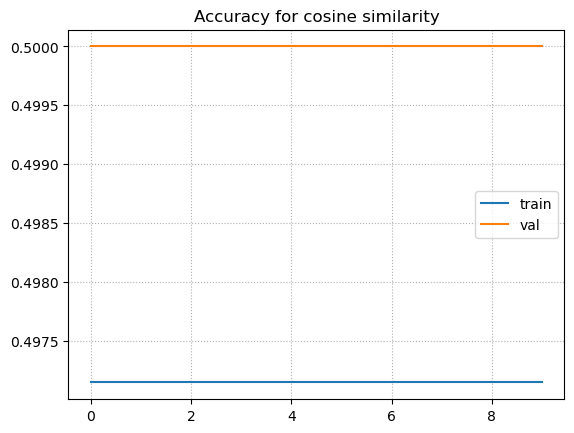

In [27]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy for cosine similarity')
plt.legend()
plt.grid(linestyle=':')
plt.show()

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

* 1
* 65
* 896
* 11214912

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                11214912  
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

`ImageDataGenerator(rescale=1./255)`

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets.

For training use `.fit()` with the following params:

```
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

In [29]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory('./data/train/',
                                         target_size=(150, 150),
                                         batch_size=20,
                                         class_mode='binary',
                                         shuffle=True)
test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory('./data/test/',
                                       target_size=(150, 150),
                                       batch_size=20,
                                       class_mode='binary',
                                       shuffle=True)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [30]:
model = Sequential()
model.trainable = True
model.add(Input(shape=input_shape))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
loss='binary_crossentropy'
model.compile(optimizer = SGD(learning_rate=learning_rate, momentum=momentum),
              loss=loss, metrics = ['accuracy'])

In [32]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
184/184 [==============================] - 9s 49ms/step - loss: 0.6659 - accuracy: 0.5771 - val_loss: 0.5961 - val_accuracy: 0.6765
Epoch 2/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5922 - accuracy: 0.6818 - val_loss: 0.5529 - val_accuracy: 0.7211
Epoch 3/10
184/184 [==============================] - 9s 48ms/step - loss: 0.5457 - accuracy: 0.7272 - val_loss: 0.6075 - val_accuracy: 0.6558
Epoch 4/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5240 - accuracy: 0.7503 - val_loss: 0.5227 - val_accuracy: 0.7647
Epoch 5/10
184/184 [==============================] - 9s 48ms/step - loss: 0.4904 - accuracy: 0.7705 - val_loss: 0.5149 - val_accuracy: 0.7407
Epoch 6/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4645 - accuracy: 0.7884 - val_loss: 0.5204 - val_accuracy: 0.7614
Epoch 7/10
184/184 [==============================] - 9s 48ms/step - loss: 0.4342 - accuracy: 0.8099 - val_loss: 0.5141 - val_accuracy: 0.7560

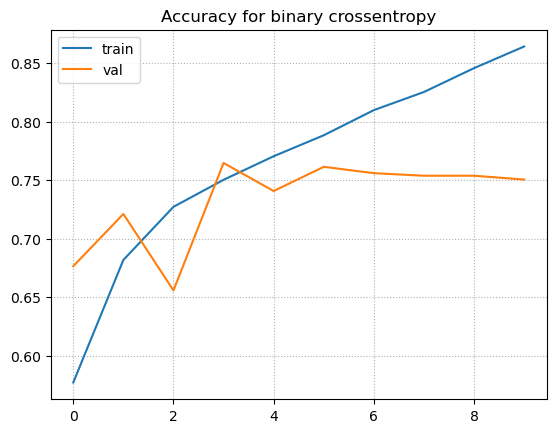

In [33]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy for binary crossentropy')
plt.legend()
plt.grid(linestyle=':')
plt.show()

In [34]:
print(f'''Median of the training accuracy: {round(np.median(history.history['accuracy']), 4)}''')

Median of the training accuracy: 0.7794


### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

In [35]:
print(f'''Standard deviation of the training loss: {round(np.std(history.history['loss']), 4)}''')

Standard deviation of the training loss: 0.0951


### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. Add the following augmentations to your training data generator:

* `rotation_range=50`,
* `width_shift_range=0.1`,
* `height_shift_range=0.1`,
* `zoom_range=0.1`,
* `horizontal_flip=True`,
* `fill_mode='nearest'`

### Question 5

Let's train our model for 10 more epochs using the same code as previously.

* Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108